## Image Paraphrasing Using Blip

A few months ago I tried building an image paraprhaser that would take an input, use it to create an image using a generative image model and caption the image. The idea was the caption could be a paraphrased version of the input text. 

My [initial attempt](https://github.com/kailinkoch/image-paraphraser) was not very good, mostly due to the limitations of the captioning model. I am using the same image generation model via DeepAI, but using the interface as I ran out of free credits on the API.

Recently I discovered a newer image caption model [BLIP](https://proceedings.mlr.press/v162/li22n.html) from Salesforce. Let's see if it fares any better. Again, this is just a toy model. If time permits I might integrate some automatic evaluation metrics and see how it does on a larger dataset. Or, finetune on a generated image dataset.

In [13]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

In [ ]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [31]:
def create_image(input_image):
    im = Image.open(input_image)
    raw_image = im.convert('RGB')
    size = 200,200
    im.thumbnail(size)
    return raw_image, im

In [33]:
def run_blip (raw_image):
    inputs = processor(raw_image, return_tensors="pt")
    out = model.generate(**inputs)
    return processor.decode(out[0], skip_special_tokens=True)

In [57]:
def run_image_paraphraser(input_text, input_image):
    raw_image, im = create_image(input_image)
    caption = run_blip(raw_image)
    print('input: ', input_text)
    print('image caption: ', caption)
    return im

## Test 1: The Coffee Cat

input:  cat drinking coffee
image caption:  a cat is drinking from a cup


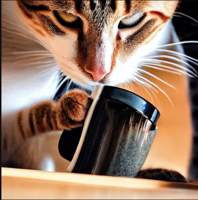

In [66]:
input_text = "cat drinking coffee"
input_image = "images/cat_drinking_coffee.png"
run_image_paraphraser(input_text, input_image)

input:  a cat is drinking from a cup
image caption:  a cat with a cup of coffee


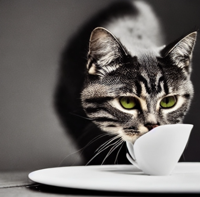

In [59]:
input_text = 'a cat is drinking from a cup'
input_image = 'images/cat_is_drinking_from_cup.png'
run_image_paraphraser(input_text, input_image)

## Test 2: The Racing Rabbit

input:  a cat is drinking from a cup
image caption:  a rabbit is sitting on top of a car


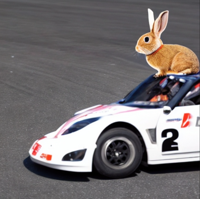

In [60]:
input_image = "a rabbit driving a racecar"
input_image = "images/rabbit_racecar.png"
run_image_paraphraser(input_text, input_image)

input:  a rabbit is sitting on top of a car
image caption:  a rabbit is sitting on top of a car


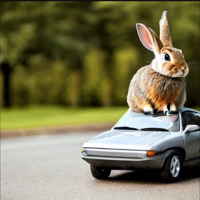

In [63]:
input_text = "a rabbit is sitting on top of a car"
input_image = "images/rabbit_car.png"
run_image_paraphraser(input_text, input_image)

## Verdict = Inconclusive!

The problem is our images are way better here! We need to test this on identical images

input:  cat drinking coffee
image caption:  a cat with green eyes and a cup of coffee


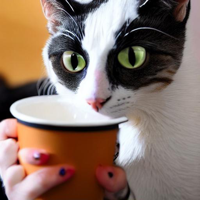

In [68]:
input_text = "cat drinking coffee"
input_image = "original_images/coffee_cat.jpg"
run_image_paraphraser(input_text, input_image)

input:  a cat with green eyes and a cup of coffee
image caption:  a cat with green eyes


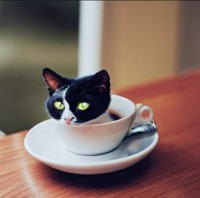

In [69]:
input_text = "a cat with green eyes and a cup of coffee"
input_image = "original_images/green_eyes.png"
run_image_paraphraser(input_text, input_image)

input:  a rabbit driving a racecar
image caption:  a small rabbit is sitting on the ground in the middle of the road


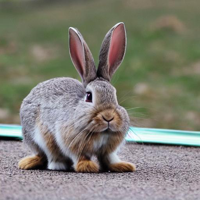

In [70]:
input_text = "a rabbit driving a racecar"
input_image = "original_images/racing_rabbit.jpg"
run_image_paraphraser(input_text, input_image)

input:  a small rabbit is sitting on the ground in the middle of the road
image caption:  a white rabbit sitting on the ground in the middle of the road


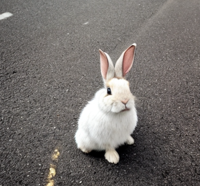

In [72]:
input_text = "a small rabbit is sitting on the ground in the middle of the road"
input_image = "original_images/ground_rabbit.png"
run_image_paraphraser(input_text, input_image)